In [1]:
import numpy as np
import pandas as pd
import pickle
from IPython.display import display as display_dataframe
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, save_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers
import keras
# from keras.applications.xception import Xception
# from keras.applications.resnet50 import ResNet50
# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg19 import VGG19
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications.mobilenetv2 import MobileNetV2
# from keras.applications.densenet import DenseNet121
import cv2
import os
import seaborn as sns
# from keras.preprocessing.image import load_img, img_to_array


import warnings
warnings.filterwarnings('ignore')

def display_image(image, title=''):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Using TensorFlow backend.


# load data

In [2]:
#vgg can't take input of 28x28 so we shall resize all our images
pickle_folder = "pickle files"
input_shape=(32, 32, 1)
data = pickle.load(open('data.pickle', 'rb'))
print("Data of format:")
for ch in data:
    print("data_length(" + ch + ") =", len(data[ch]))

#no. of classes
classes = len(data.keys())

Data of format:
data_length(ह) = 2000
data_length(क्ष) = 2000
data_length(ब) = 2000
data_length(व) = 2000
data_length(ज्ञ) = 2000
data_length(ख) = 2000
data_length(भ) = 2000
data_length(य) = 2000
data_length(ड) = 2000
data_length(फ) = 2000
data_length(त्र) = 2000
data_length(ट) = 2000
data_length(झ) = 2000
data_length(च) = 2000
data_length(म) = 2000
data_length(न) = 2000
data_length(घ) = 2000
data_length(क) = 2000
data_length(द) = 2000
data_length(ङ) = 2000
data_length(ग) = 2000
data_length(ध) = 2000
data_length(र) = 2000
data_length(ठ) = 2000
data_length(ढ) = 2000
data_length(श) = 2000
data_length(थ) = 2000
data_length(ल) = 2000
data_length(ज) = 2000
data_length(ञ) = 2000
data_length(ण) = 2000
data_length(स) = 2000
data_length(छ) = 2000
data_length(प) = 2000
data_length(त) = 2000
data_length(ष) = 2000


# Display functions and others

In [32]:
def display_image(image, title='image'):
    '''
    uses openCV to display 1 image in a new window
    '''
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def display_all_in_a_list(image_list, titles=None, scale_factor=1):
    '''
    image_list: a single image, or a list of images
    -----------------------------------
    uses matplotlib to display all images in 'image_list' in the same cell
    '''
    plt.rcParams['figure.figsize'] = [10*scale_factor, len(image_list)*5*scale_factor]
    _, axes = plt.subplots(len(image_list), 1)
    if len(image_list) == 1:
        axes.imshow(image_list[0], cmap='gray')
        if titles is not None:
            axes.set_title(titles[0])
    else:
        for index in range(len(image_list)):
            axes[index].imshow(image_list[index])
            if titles is not None:
                axes[index].set_title(titles[index])
    plt.show()

# Loading trained CNN

In [4]:
import tensorflow as tf
from keras import backend as k
 
###################################
# TensorFlow wizardry
config = tf.ConfigProto()
 
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True
 
# Only allow a total of half the GPU memory to be allocated
# config.gpu_options.per_process_gpu_memory_fraction = 0.5
 
# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))


print("GPUs:", k.tensorflow_backend._get_available_gpus())

print("input shape:", input_shape)

GPUs: []
input shape: (32, 32, 1)


creating the model below

In [5]:
model_files = [file for file in os.listdir(pickle_folder)]
model_files

['group_CNNs',
 '34-35',
 '36',
 '24-25',
 'class_numerals_36.pickle',
 '26-28',
 '20-23',
 '17-19',
 'lenet_relu_2_conv_layer.h5',
 '2-5 permutations',
 '6-11',
 'lenet_relu_1_conv_layer.h5',
 '32-33',
 'before new experiments starting December',
 '12-16',
 'results',
 '29-31',
 'lenet_relu_3_conv_layer.h5',
 'vgg19']

In [5]:
%%time

import pickle
batch_size = 64

# models = []

#load models
model = keras.models.load_model(os.path.join(pickle_folder, '36/Lenet_ब_य_ञ_त_क्ष_फ_ठ_स_छ_ज्ञ_च_ण_द_र_ट_म_प_क_ङ_भ_न_ल_ह_त्र_ज_ख_झ_थ_घ_श_ष_ग_व_ढ_ड_ध.h5'))
# model = load_model(os.path.join(pickle_folder, 'VGG19_त_19.h5'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 10, 10, 12)        1812      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 5, 5, 12)          0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 5, 5, 12)          0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 1, 1, 120)         36120     
__________

In [6]:
for i in range(len(model.layers)):
    print(i, model.layers[i])

0 <keras.layers.convolutional.Conv2D object at 0x7f4bca4fdda0>
1 <keras.layers.pooling.MaxPooling2D object at 0x7f4bca4fdf98>
2 <keras.layers.core.Dropout object at 0x7f4bca52fc88>
3 <keras.layers.convolutional.Conv2D object at 0x7f4bca52fba8>
4 <keras.layers.pooling.MaxPooling2D object at 0x7f4bc9dd15f8>
5 <keras.layers.core.Dropout object at 0x7f4bca4fdba8>
6 <keras.layers.convolutional.Conv2D object at 0x7f4bc9d31c18>
7 <keras.layers.core.Flatten object at 0x7f4bc96d0128>
8 <keras.layers.core.Dense object at 0x7f4bc96d02b0>
9 <keras.layers.core.Dropout object at 0x7f4bc915dc88>
10 <keras.layers.core.Dense object at 0x7f4bc9dd1588>


In [17]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
model.layers[0].get_weights()[0].reshape((5, 5, 6))

array([[[0.07, 5.54, -7.79, -0.11, -6.52, 1.91],
        [-0.11, 6.75, -6.28, -0.14, -3.52, 3.58],
        [0.04, 3.51, -7.07, -0.12, -9.09, -0.42],
        [-0.13, 2.04, -7.15, -0.03, -9.29, -4.28],
        [0.01, 1.47, -8.79, 0.07, -9.29, -4.43]],

       [[0.18, 13.52, -11.55, -0.10, -22.80, 13.99],
        [0.06, 18.28, -10.06, 0.14, -22.66, 21.49],
        [0.11, 16.25, -10.60, -0.09, -27.95, 20.60],
        [-0.18, 12.13, -9.79, -0.02, -25.54, 13.46],
        [-0.14, 7.81, -11.40, 0.17, -22.23, 7.98]],

       [[-0.05, 18.99, -12.84, -0.04, -34.15, 21.96],
        [0.09, 26.22, -11.08, 0.13, -37.76, 34.41],
        [0.09, 25.16, -10.59, -0.14, -39.41, 35.40],
        [0.13, 18.71, -10.59, -0.10, -34.60, 26.38],
        [-0.18, 12.08, -12.43, 0.05, -27.50, 17.44]],

       [[-0.13, 21.42, -12.58, 0.08, -32.09, 24.40],
        [-0.13, 26.05, -10.39, 0.00, -34.62, 34.59],
        [0.04, 23.97, -10.63, 0.13, -36.49, 34.40],
        [-0.08, 17.84, -10.23, -0.01, -28.14, 26.16],
      

In [20]:
get_CNN_intermediate_output = k.function([model.layers[0].input, k.learning_phase()],
                                  [model.layers[6].output])
characters = list(data.keys())
intermediate_output_list = []

for ch in characters:
    input_image = cv2.resize(data[ch][0]/255, (input_shape[0], input_shape[1])).reshape((1, input_shape[0], input_shape[1], 1))
#     print(ch, input_image.shape)
    intermediate_output_list.append(get_CNN_intermediate_output([input_image, 0]))

In [21]:
def get_single_image(something, margin = 1):
    #check for correct input shape
    if len(something.shape) > 3:
        raise Exception("Input should be of format (x, y, channels). Got {}".format(something.shape))
    
    #calculate the output shape of our returned image
    channels = something.shape[2]
    rows = int(channels**0.5)
    columns = int(channels / rows)
    while channels % rows != 0:
        rows -= 1
    while channels % columns != 0:
        columns += 1
    print("{} rows and {} columns of shape {}.".format(rows, columns, something.shape[:2]))
    
    margin = margin
    value = 255
        
    # stack the columns
    listy = [something[:, :, i*columns] for i in range(rows)]
    for i in range(rows):
        for j in range(1, columns):
            if margin:
                listy[i] = np.append(listy[i], np.array([[value]*margin]*listy[i].shape[0]), axis=1)
            listy[i] = np.append(listy[i], something[:, :, i*columns + j], axis=1)
    
    #stack the rows
    image = listy[0]
    for i in range(1, rows):
        if margin:
            image = np.append(image, np.array([[value]*listy[i].shape[1]]*margin), axis=0)
        image = np.append(image, listy[i], axis=0)
    
    return image

CNN_intermediate_images_for_hindi_characters = [get_single_image(intermediate_output_list[i][0][0], margin=0) for i in range(len(characters))]

10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).
10 rows and 12 columns of shape (1, 1).


In [32]:
model.layers[3].get_weights()[0]

array([[[[-2.75508538e-02, -6.90393671e-02, -3.98493931e-02, ...,
          -5.71588203e-02, -2.61300206e-02,  9.72646326e-02],
         [-1.48736626e-01,  4.27058846e-01, -1.74909178e-03, ...,
          -3.01809907e-01, -6.67058587e-01,  9.86961555e-03],
         [-5.93029819e-02, -4.49183136e-02, -9.85606983e-02, ...,
           5.41685969e-02,  7.38759339e-03,  7.00091422e-02],
         [ 5.71903735e-02, -6.78113252e-02, -9.04231220e-02, ...,
           5.36692888e-03, -1.64651796e-02, -6.30353391e-03],
         [ 9.69915092e-01,  3.04350525e-01, -1.02488354e-01, ...,
           3.98875654e-01, -2.93840244e-02,  1.78932529e-02],
         [ 2.09503621e-02,  6.06497824e-01, -9.52516310e-03, ...,
          -3.13043982e-01, -3.28836024e-01,  1.29180565e-01]],

        [[ 1.01675719e-01, -8.92165899e-02,  1.12681180e-01, ...,
           4.80272472e-02,  1.13352209e-01, -3.32784876e-02],
         [ 7.75416911e-01, -5.19081831e-01, -3.32371086e-01, ...,
           9.13299471e-02, -1.150457

2 rows and 3 columns of shape (5, 5).


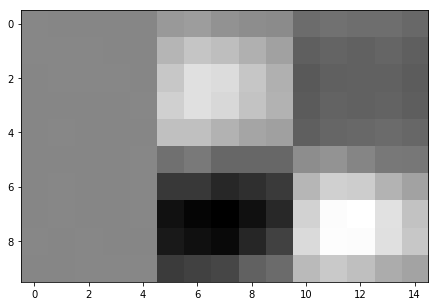

In [33]:
weights = get_single_image(model.layers[0].get_weights()[0].reshape((5, 5, 6)), margin=0)
# weights = (weights - weights.min()) / (weights.max() - weights.min()) * 255
display_all_in_a_list([weights])

In [29]:
print(weights[:5, 10:15])
print()
print(weights[:5, 5:10])

print()
print(weights[5:10, 5:10])


[[-7.79 -6.28 -7.07 -7.15 -8.79]
 [-11.55 -10.06 -10.60 -9.79 -11.40]
 [-12.84 -11.08 -10.59 -10.59 -12.43]
 [-12.58 -10.39 -10.63 -10.23 -11.67]
 [-11.49 -9.34 -8.96 -8.07 -9.03]]

[[5.54 6.75 3.51 2.04 1.47]
 [13.52 18.28 16.25 12.13 7.81]
 [18.99 26.22 25.16 18.71 12.08]
 [21.42 26.05 23.97 17.84 12.69]
 [16.81 16.79 12.69 9.04 7.61]]

[[-6.52 -3.52 -9.09 -9.29 -9.29]
 [-22.80 -22.66 -27.95 -25.54 -22.23]
 [-34.15 -37.76 -39.41 -34.60 -27.50]
 [-32.09 -34.62 -36.49 -28.14 -20.32]
 [-22.13 -19.98 -18.95 -10.98 -7.92]]


In [40]:
a.shape

(108, 144)

द


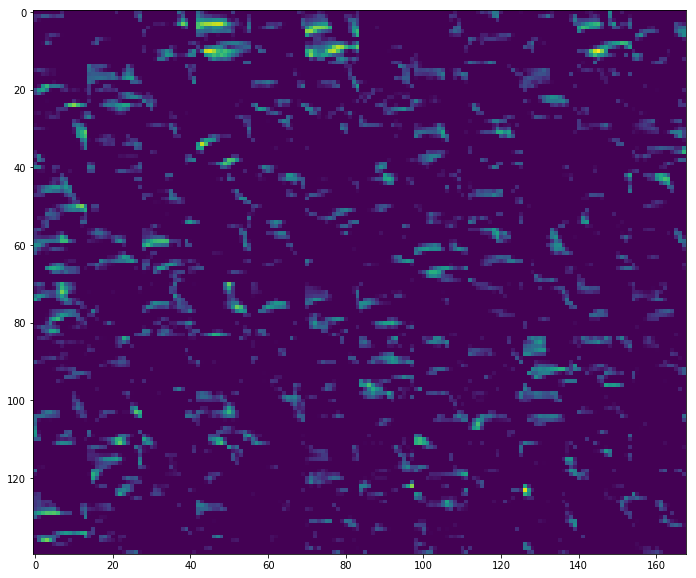

ब


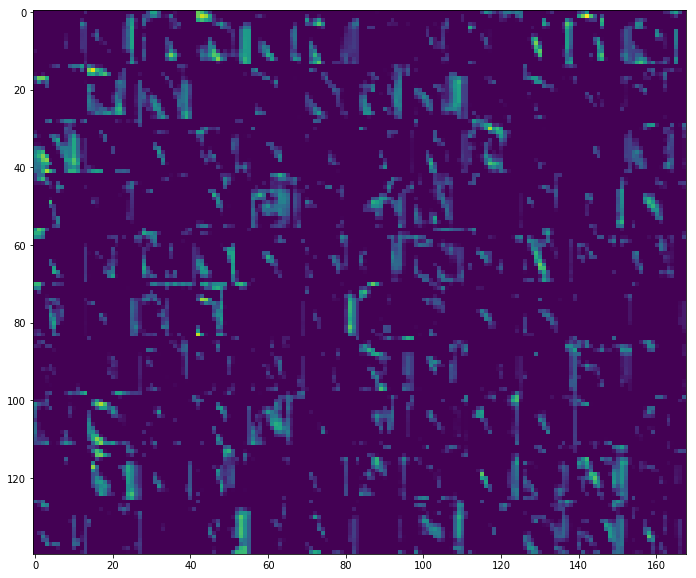

क्ष


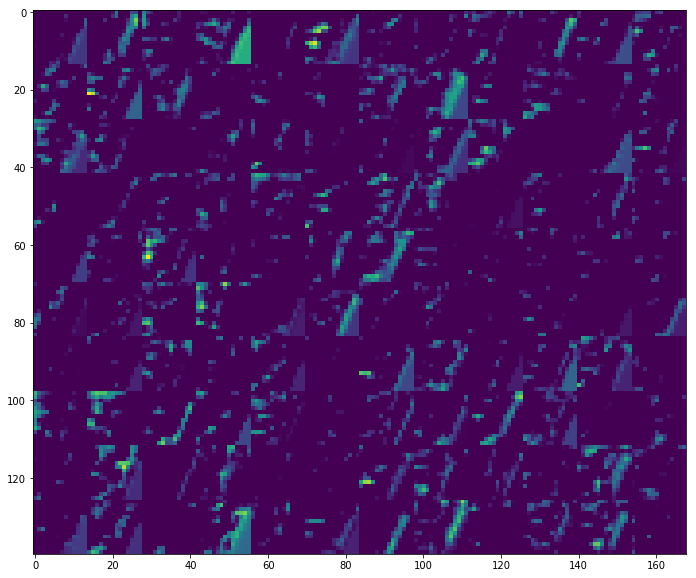

र


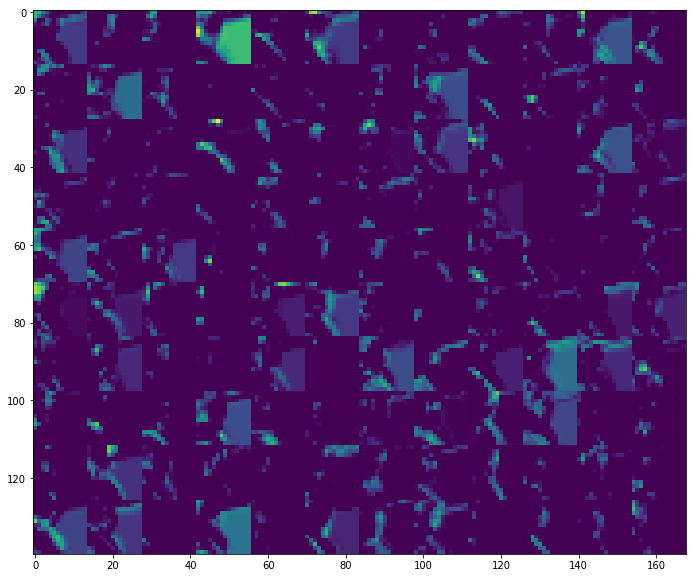

झ


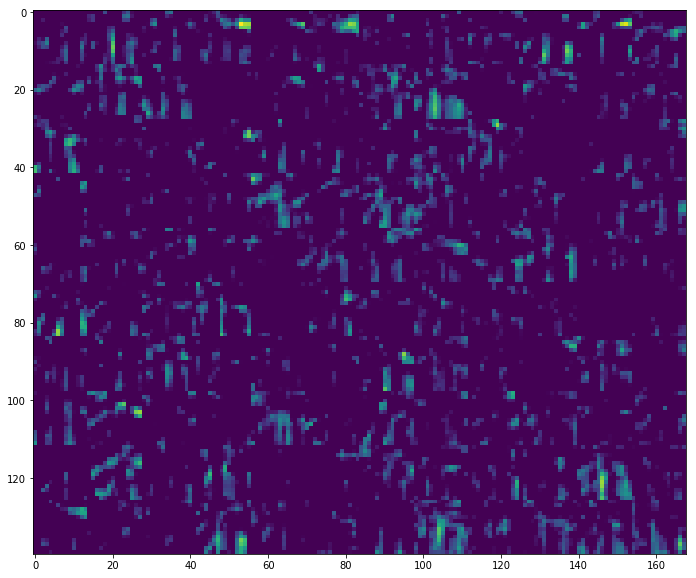

क


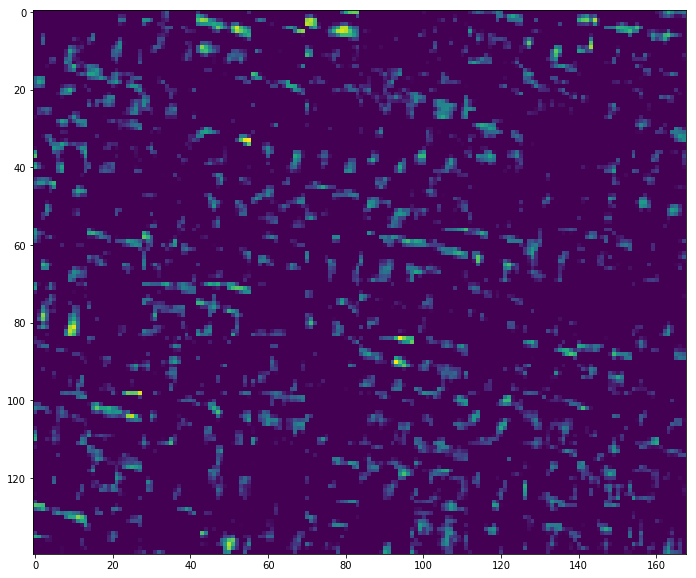

न


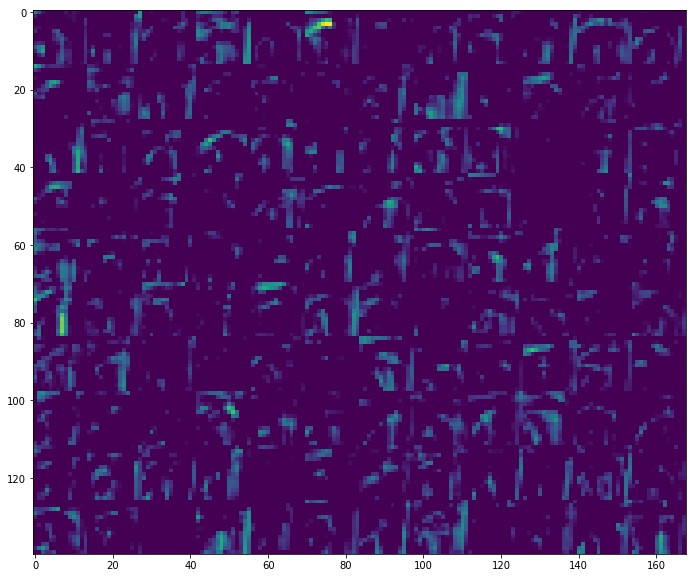

ञ


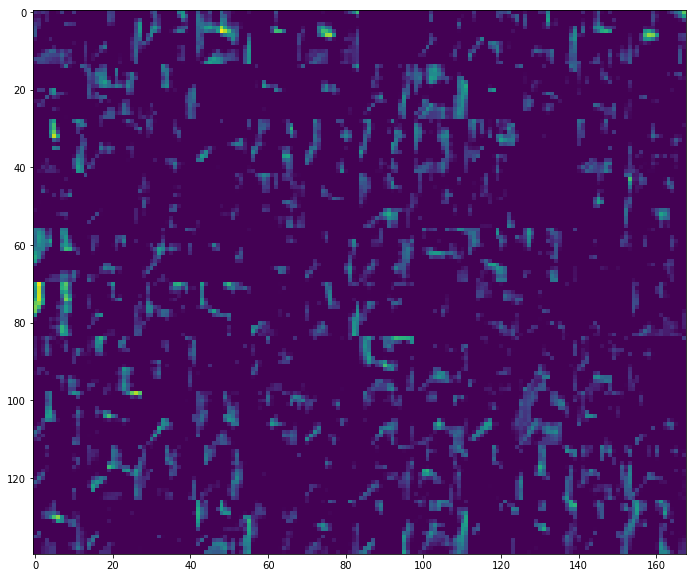

य


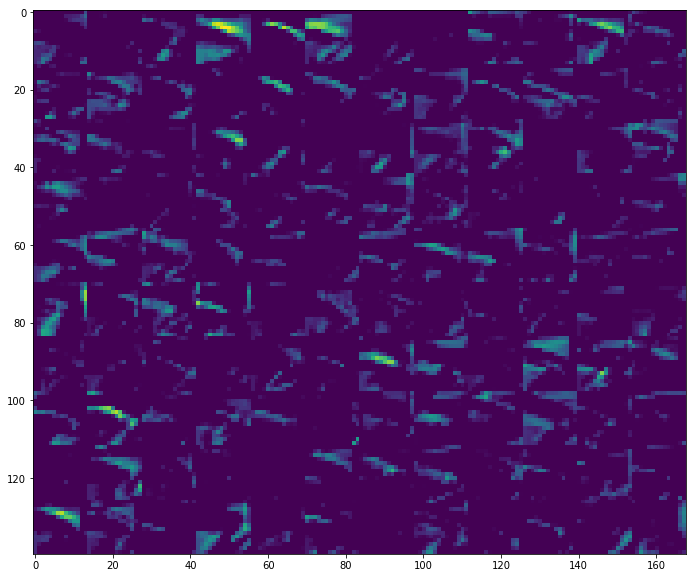

ख


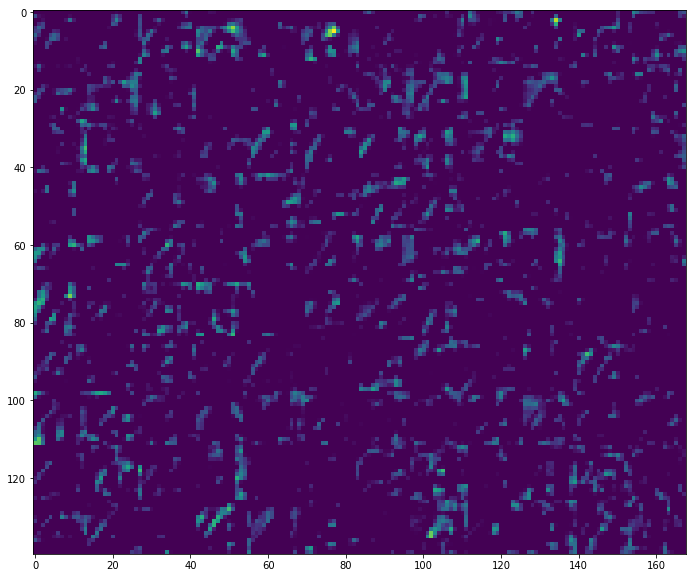

ह


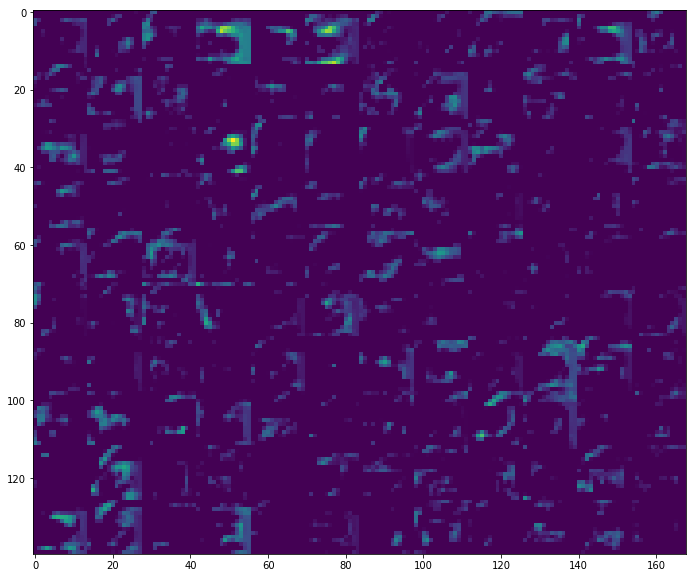

ङ


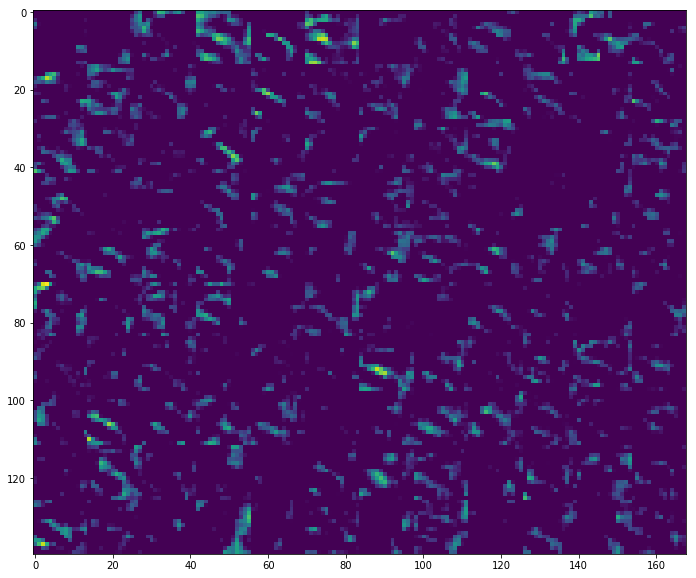

ड


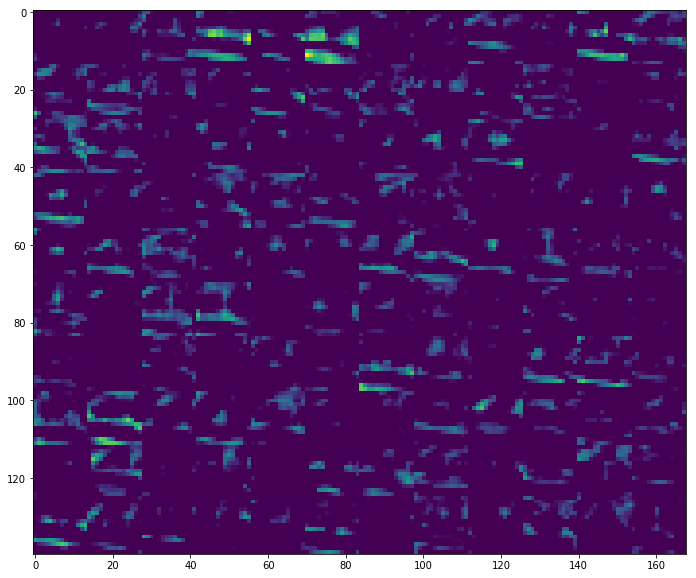

ष


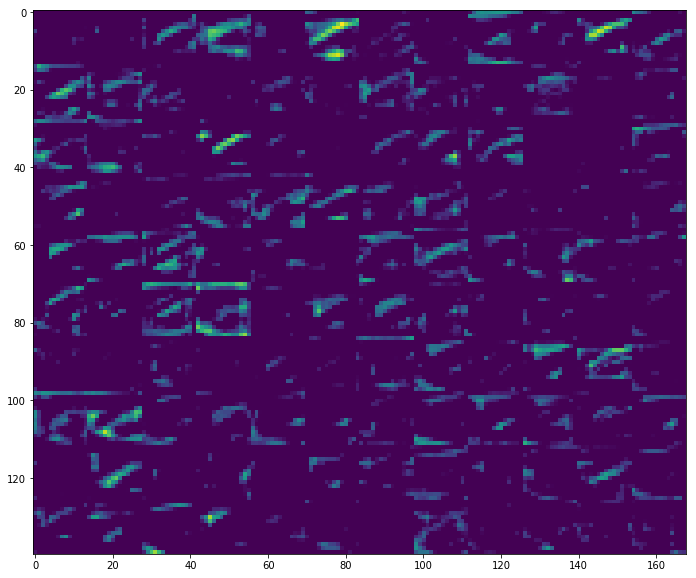

ल


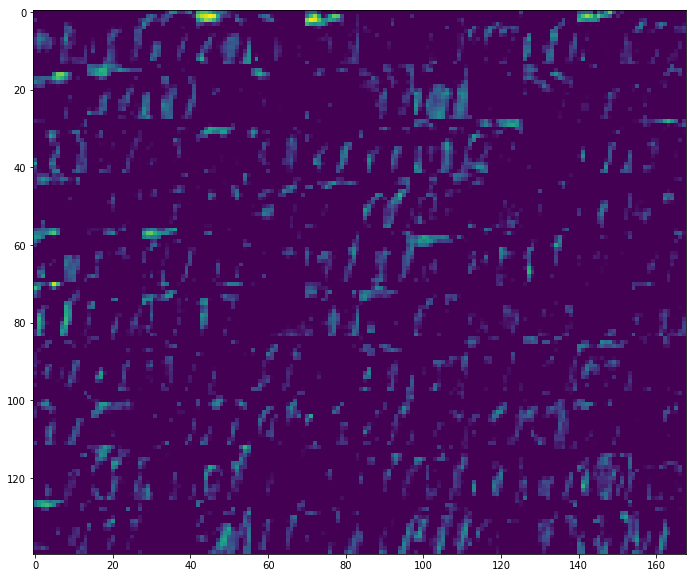

ज्ञ


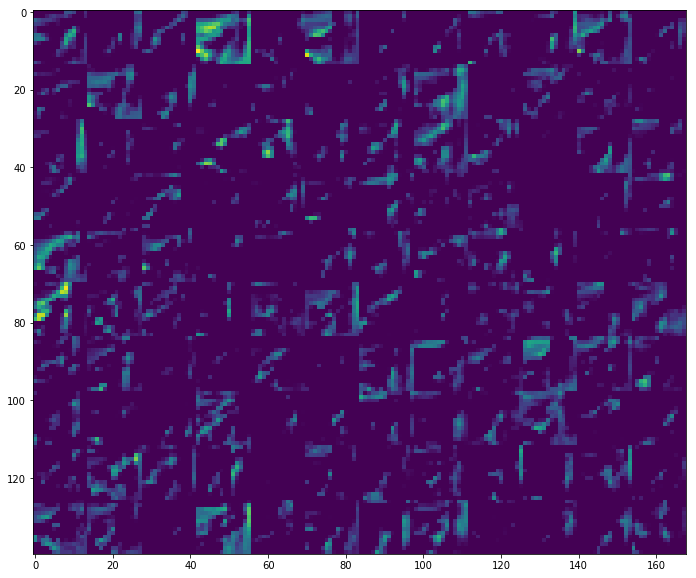

व


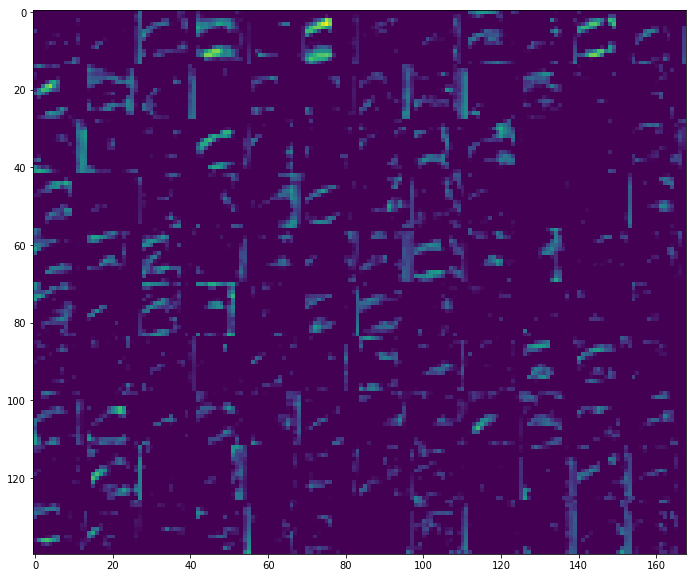

ठ


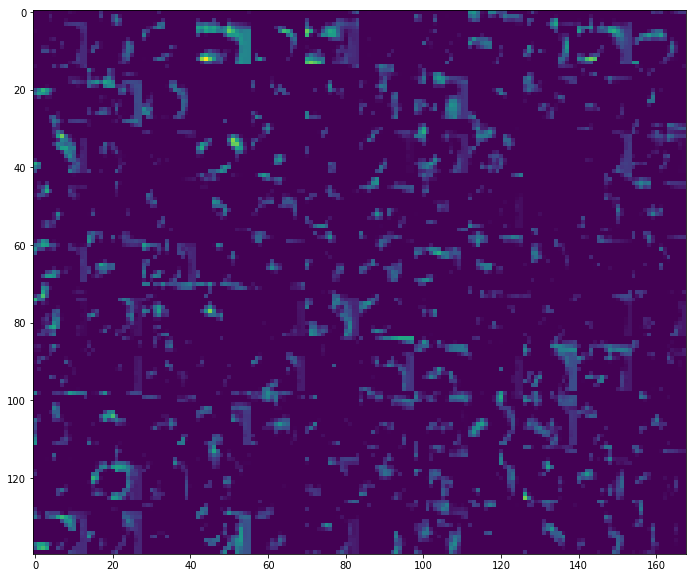

ध


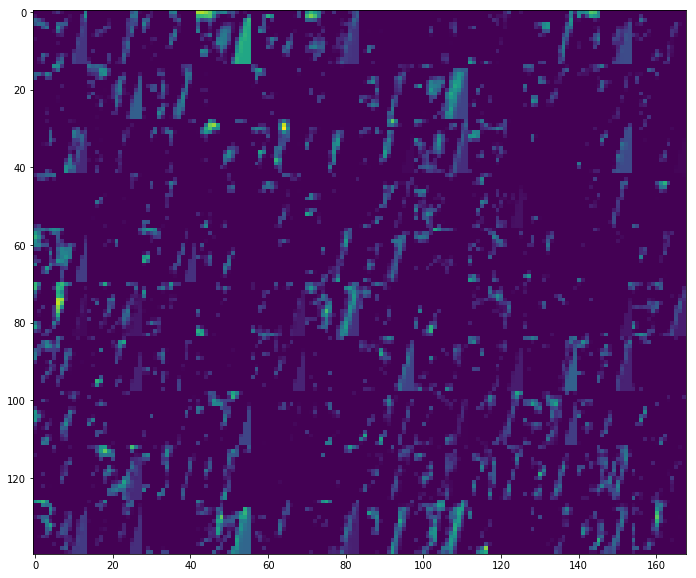

त्र


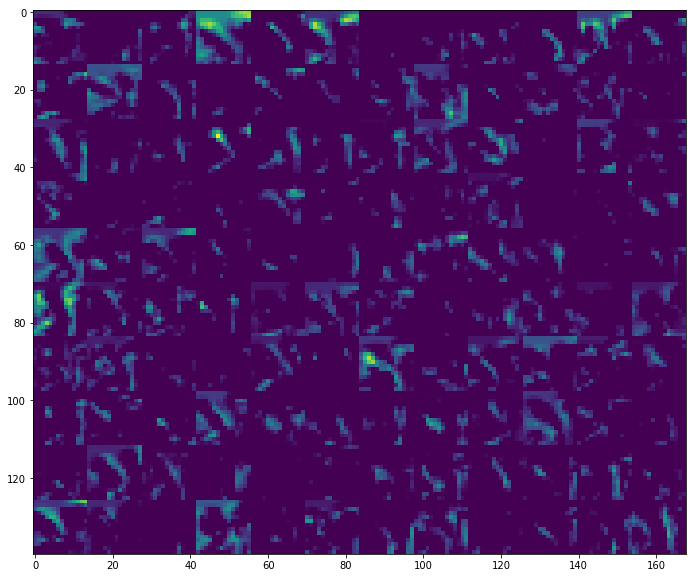

ज


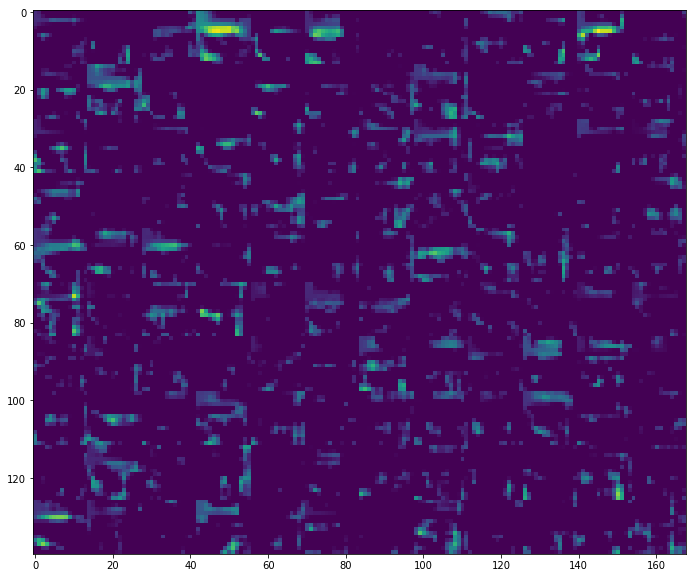

स


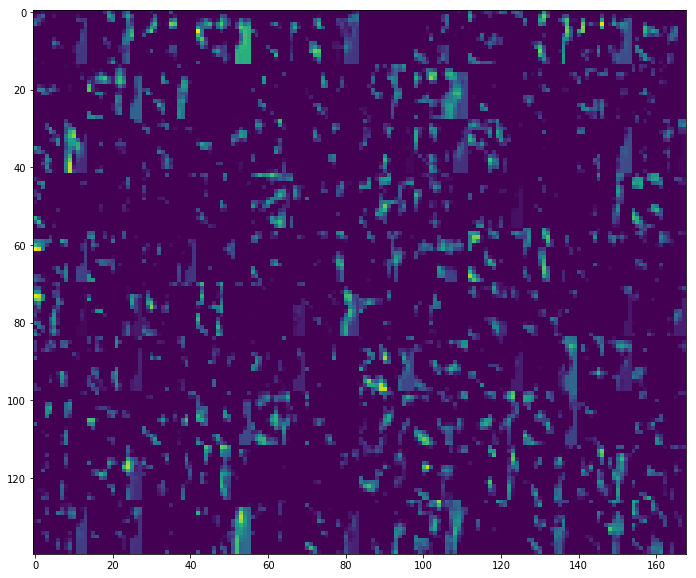

फ


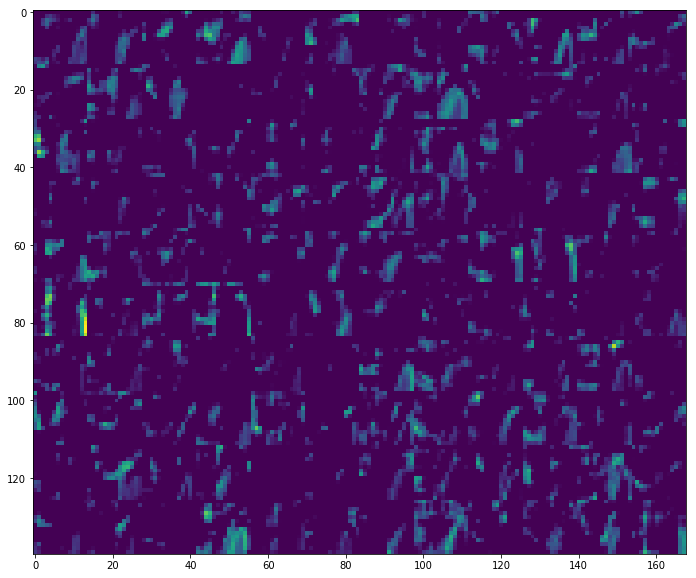

थ


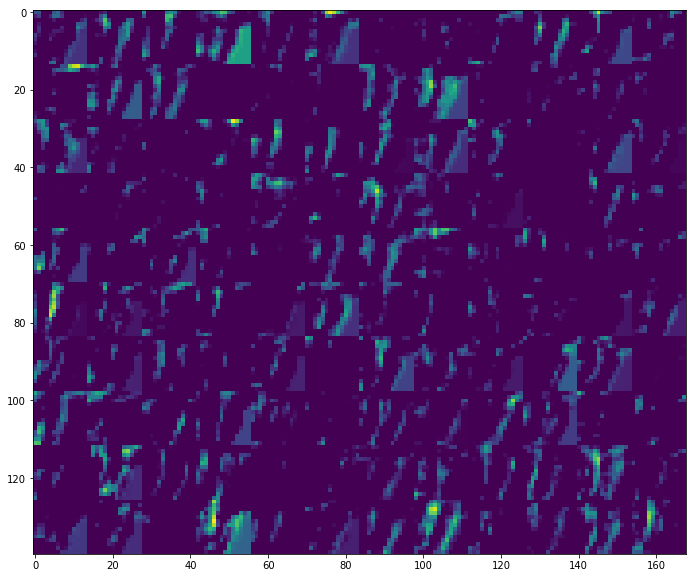

भ


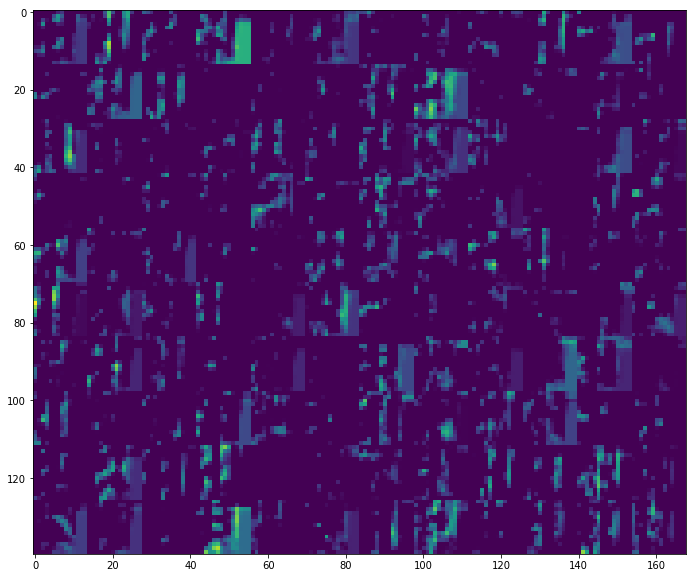

ण


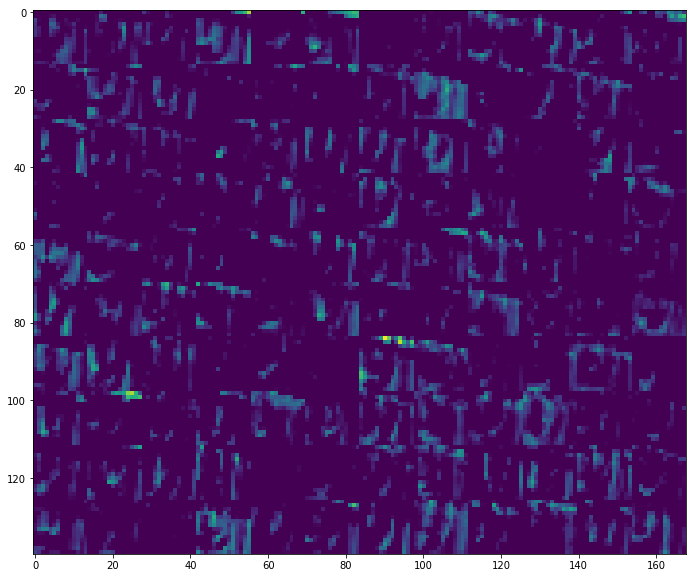

ग


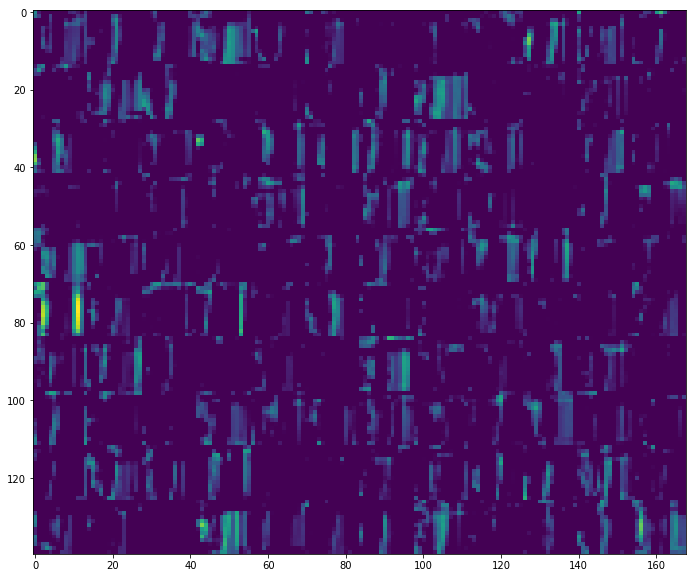

ढ


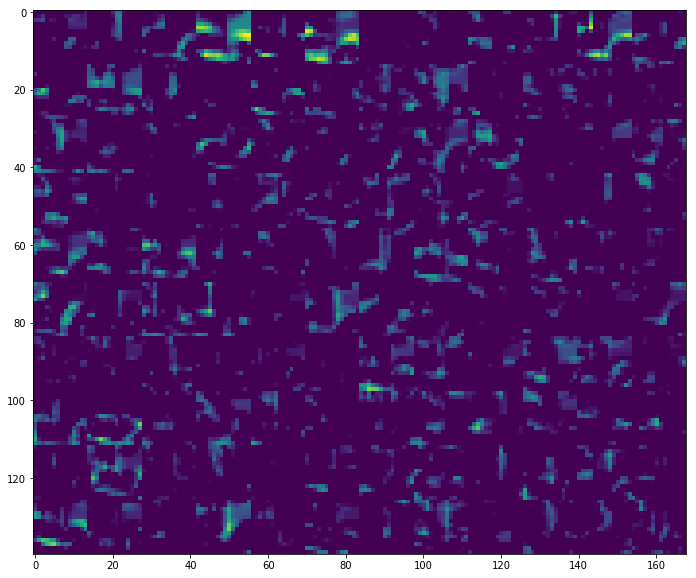

त


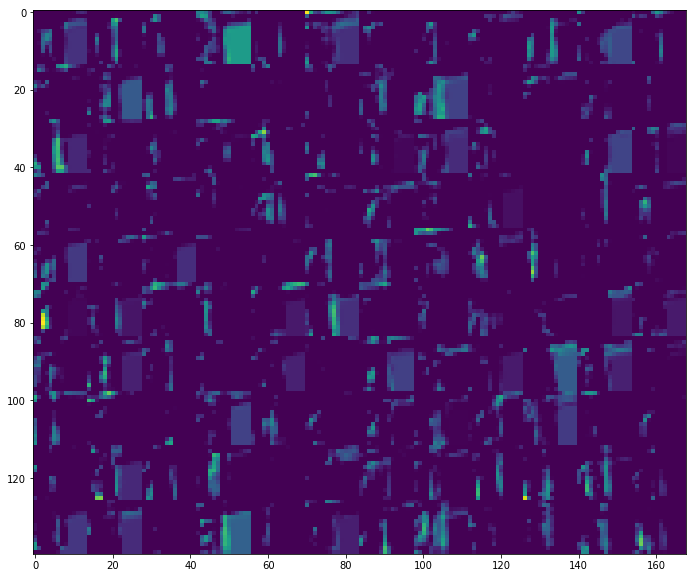

श


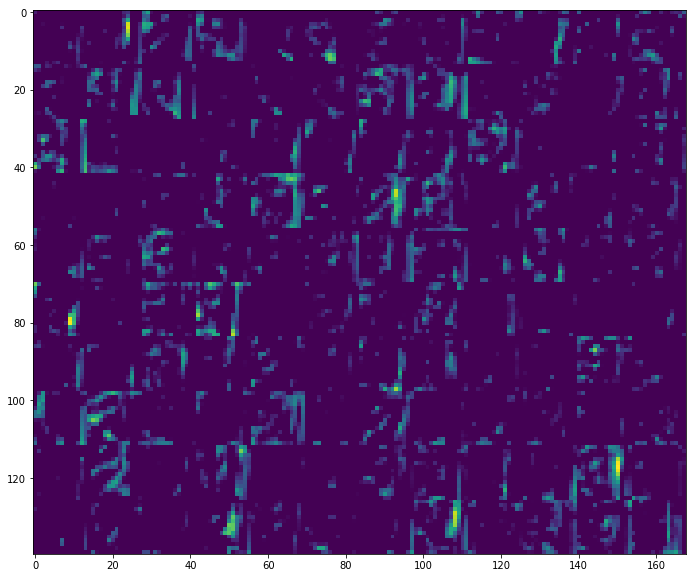

छ


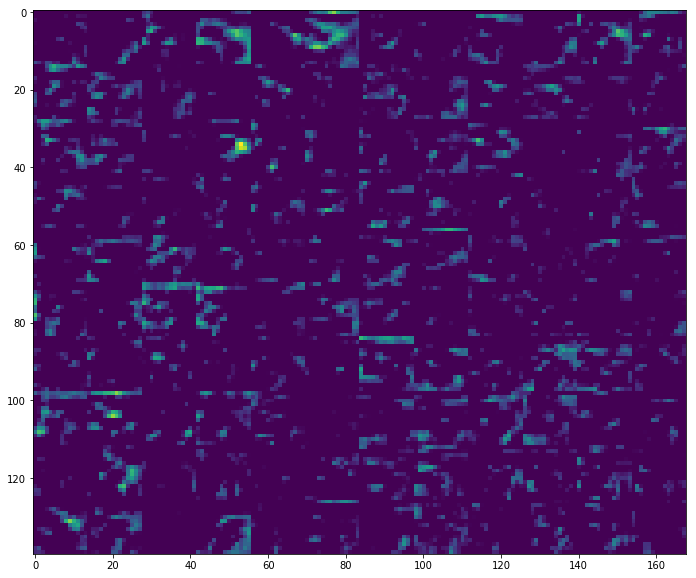

प


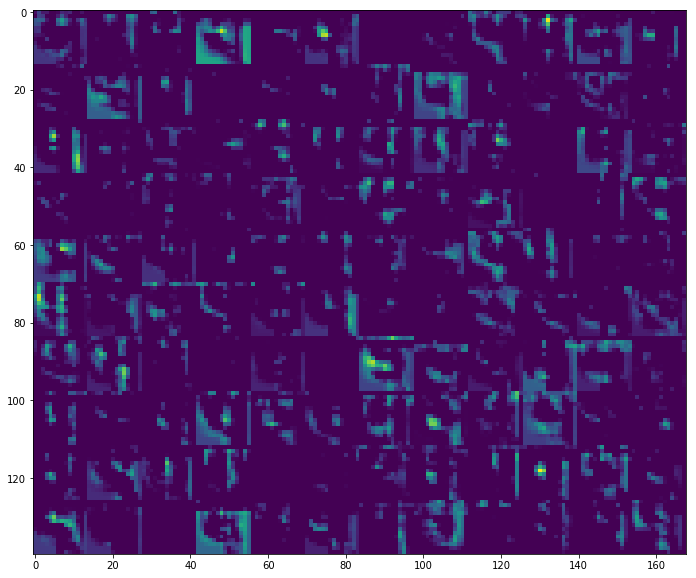

च


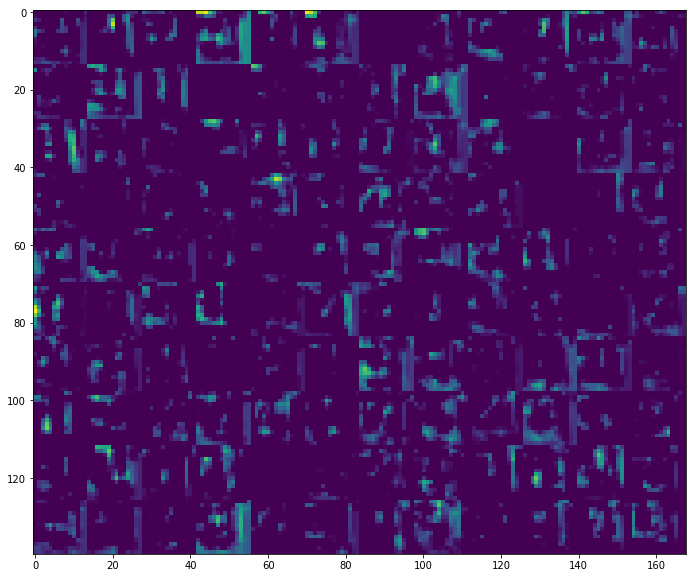

म


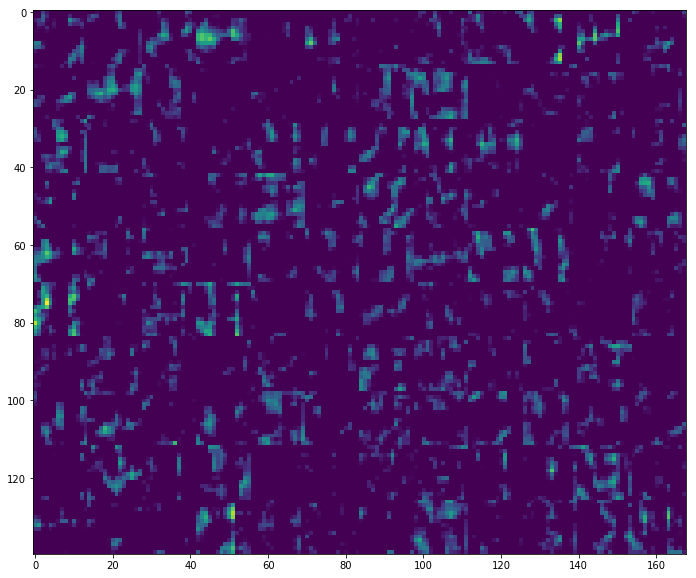

घ


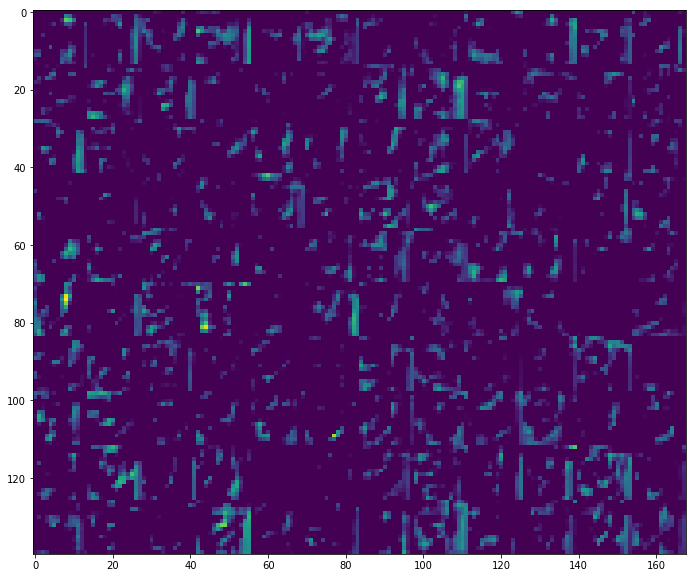

ट


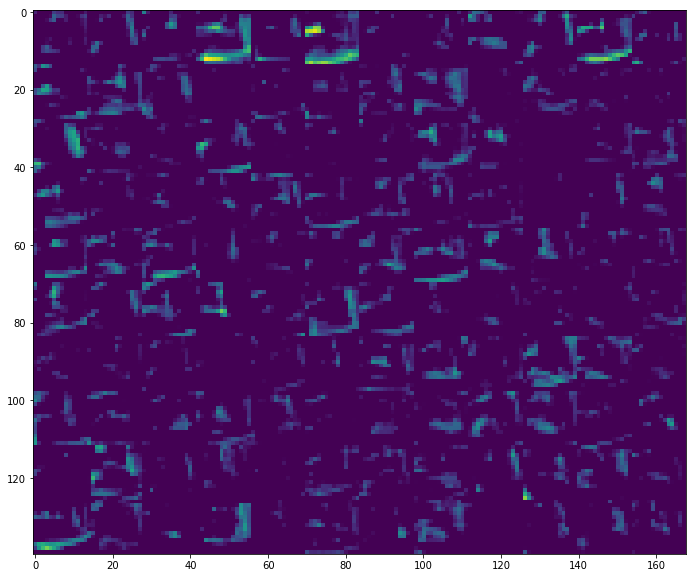

In [54]:
scale_up_factor = 3
show_images = len(CNN_intermediate_images_for_hindi_characters)
for i in range(show_images):
    print(characters[i])
    a = CNN_intermediate_images_for_hindi_characters[i]
    display_all_in_a_list([a], scale_factor=2)
#         plt.imshow(a, cmap='gray')